In [1]:
#HIERARCHICAL CLUSTERING-AGGLOMERATIVE
#We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. 
#Remember that agglomerative is the bottom up approach.

#In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering.

#We will also be using Complete Linkage as the Linkage Criteria.

In [2]:
#Packages
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
#Generating Random Data
#We will be generating a set of data using the make_blobs class.

#Input these parameters into make_blobs:
    #n_samples: The total number of points equally divided among clusters.
        #Choose a number from 10-1500
    #centers: The number of centers to generate, or the fixed center locations.
        #Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
    #cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
        #Choose a number between 0.5-1.5
        


In [4]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

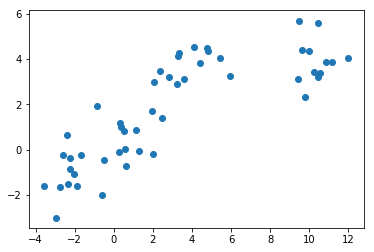

In [5]:
#Plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [6]:
#Agglomerative Clustering
#We will start by clustering the random data points we just created.
#The Agglomerative Clustering class will require two inputs:

    #n_clusters: The number of clusters to form as well as the number of centroids to generate.
        #Value will be: 4
    #linkage: Which linkage criterion to use. 
        #The linkage criterion determines which distance to use between sets of observation. 
        #The algorithm will merge the pairs of cluster that minimize this criterion.
        #Value will be: 'complete'
        #Note: It is recommended you try everything with 'average' as well

#Save the result to a variable called agglom

In [6]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [7]:
#Fit the model with X2 and y2 from the generated data above.
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [8]:
#Run the following code to show the clustering!
#Remember to read the code and comments to gain more understanding on how the plotting works.

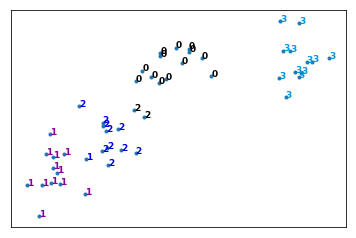

In [9]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [12]:
#Dendrogram Associated for the Agglomerative Hierarchical Clustering

#Remember that a distance matrix contains the distance from each point to every other point of a dataset.
#Use the function distance_matrix, which requires two inputs. 
#Use the Feature Matrix, X2 as both inputs and save the distance matrix to a variable called dist_matrix

#Remember that the distance values are symmetric, with a diagonal of 0's. 
#This is one way of making sure your matrix is correct.
#(print out dist_matrix to make sure it's correct)
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         1.03375373 0.67529924 ... 0.42499652 0.26338453 0.28715996]
 [1.03375373 0.         0.52644195 ... 0.75466348 0.77356291 0.75032539]
 [0.67529924 0.52644195 0.         ... 0.27670676 0.43471874 0.41397343]
 ...
 [0.42499652 0.75466348 0.27670676 ... 0.         0.24356458 0.23424046]
 [0.26338453 0.77356291 0.43471874 ... 0.24356458 0.         0.02378626]
 [0.28715996 0.75032539 0.41397343 ... 0.23424046 0.02378626 0.        ]]


In [13]:
#Using the linkage class from hierarchy, pass in the parameters:

    #The distance matrix
    #'complete' for complete linkage

#Save the result to a variable called Z

In [14]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [14]:
#A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. 
#Each merge is represented by a horizontal line. 
#The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, 
#where cities are viewed as singleton clusters. 

#By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that 
#resulted in the depicted clustering.

#Next, we will save the dendrogram to a variable called dendro. 
#In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter:

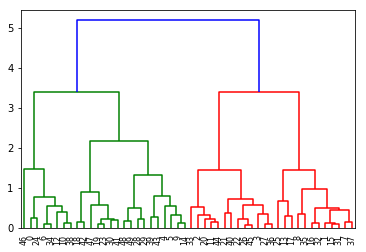

In [15]:
dendro = hierarchy.dendrogram(Z)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


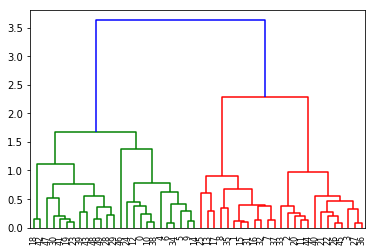

In [16]:
#AVERAGE LINKAGE
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)